In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
import requests
from bs4 import BeautifulSoup
import csv
from tqdm import tqdm
from time import sleep
import random
import pandas as pd
import plotly.graph_objects as go
import json
from itertools import tee, islice
#import dash
from dash import Dash, dcc, html, Input, Output, dash_table
# import dash_core_components as dcc 
# import dash_html_components as html

In [2]:
pd.set_option('display.max_rows', 50)  
#печать всех строх, аналогично max_columns

# You can also reset an option back to its default value like this:
# pd.reset_option('display.max_rows')
# And reset all of them back:
# pd.reset_option('all')

In [210]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [3]:
# вывести долю еще и от общего количества

## Cборка

In [4]:
folder_path = 'ooh_data'

In [5]:
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

In [6]:
dataframes = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]

In [7]:
dfs = pd.concat(dataframes, ignore_index=True)
dfs.shape

(7531594, 4)

In [8]:
dfs.columns = ['order_id', 'status', 'source', 'status_time']

In [9]:
dfs['status_time'] = pd.to_datetime(dfs['status_time'])

In [10]:
dfs.status_time = dfs.status_time.dt.tz_localize(None)

In [11]:
# Прибавляем 3 часа
dfs.status_time += pd.Timedelta(hours=3)

In [12]:
dfs.shape

(7531594, 4)

In [13]:
dfs.drop_duplicates().shape

(7531594, 4)

In [14]:
#dfs.groupby(dfs['status_time'].dt.date).count()

In [15]:
dfsp = pd.read_csv('https://redash.puls.ru/api/queries/8589/results.csv?api_key=yBnPjPTW9feg3qVwlkvDJYL8EpT0uZfzwGT5Kv7o')

In [16]:
dfsp['status_time'] = pd.to_datetime(dfsp['status_time'])
# Прибавляем 3 часа
dfsp.status_time += pd.Timedelta(hours=3)

In [17]:
dfs = pd.concat([dfs, dfsp])

In [18]:
dfs

,order_id,status,source,status_time
0,6331113,4,NaN,2023-10-31 11:27:34.989
1,6228721,7,NaN,2023-10-31 11:27:35.419
2,6163311,7,NaN,2023-10-31 11:27:35.937
3,6226536,7,NaN,2023-10-31 11:27:36.050
4,6195567,7,NaN,2023-10-31 11:27:36.509
...,...,...,...,...
179301,1585468,71,NaN,2023-11-27 05:00:04.000
179302,1584912,6,NaN,2023-11-27 05:10:06.000
179303,1590163,4,NaN,2023-12-01 17:10:23.000
179304,1579837,9,NaN,2023-11-27 04:45:04.000


In [114]:
# номера заказов из еком
dfo = pd.read_csv('https://redash.puls.ru/api/queries/8525/results.csv?api_key=cLN1dxPKexPyj7an8hXyaOZHY3zv2l4uwTPPZS42')

In [115]:
dfop = pd.read_csv('https://redash.puls.ru/api/queries/8537/results.csv?api_key=QgDv1XehCGYgkDIWmiyP1J6sPSUsXVw8WwYjoRGy')

In [116]:
dfo = pd.concat([dfo, dfop])

In [117]:
dfo['created'] = pd.to_datetime(dfo['created'])
dfo['delivery_date'] = pd.to_datetime(dfo['delivery_date'])

In [118]:
dfo = dfo[(dfo['created'].dt.month == 11) ]

In [119]:
#dfo[(dfo.inn.isna()) & (dfo.brand == 'Планета Здоровья' )]

In [120]:
dfo.marketplace_number = dfo.marketplace_number.astype('str')

In [121]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596970 entries, 0 to 20614
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  596970 non-null  int64         
 1   marketplace_number  596970 non-null  object        
 2   sys_status          577075 non-null  float64       
 3   mm                  596970 non-null  object        
 4   rk                  596970 non-null  object        
 5   inn                 554180 non-null  float64       
 6   created             596970 non-null  datetime64[ns]
 7   created_local       596970 non-null  object        
 8   delivery_date       596970 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 45.5+ MB


In [122]:
#dfo['inn'] = dfo['inn'].fillna(0).astype(int)
dfo['innst'] = dfo['inn'].astype(str)

In [123]:
inn_erka = pd.read_excel('inn_erka.xlsx')

In [124]:
inn_pz = pd.read_excel('inn_pz.xlsx')

In [125]:
dfo_erka = dfo[dfo.inn.isin(inn_erka.inn)]

In [31]:
dfo_pz = dfo[dfo.inn.isin(inn_pz.inn) | (dfo.brand == 'Планета Здоровья' )]

AttributeError: 'DataFrame' object has no attribute 'brand'

In [126]:
dfo_erka.id.nunique()

30831

In [32]:
dfo_pz.id.nunique()

NameError: name 'dfo_pz' is not defined

In [127]:
dfo_erka.brand.unique()

AttributeError: 'DataFrame' object has no attribute 'brand'

In [35]:
dfo_pz.brand.unique()

NameError: name 'dfo_pz' is not defined

In [128]:
dfs71 = dfs[dfs.status == 71]
dfs9 = dfs[dfs.status == 9]
dfs6 = dfs[dfs.status == 6]

In [129]:
# Заказы от Эркафарм
erka = pd.read_excel('Заказы пульса, Эркафарм.xlsx')

In [130]:
erka = erka.iloc[:, [0, 4, 5]]
erka.columns = ['er_order_id', 'er_status', 'er_status_time']

In [131]:
erka['er_status_time'] = pd.to_datetime(erka['er_status_time'], dayfirst=True)

In [132]:
erka71 = erka[erka.er_status == 'Собрали заказ / Оттправили Ready']

In [133]:
erka9 = erka[erka.er_status == 'Продан']

In [134]:
# Заказы от Планеты здоровья
pz = pd.read_excel('Заказы пульса за ноябрь, Планета Здоровья.xlsx')

In [135]:
pz = pz.iloc[:, [1, 2, 3]]

In [136]:
pz.columns = ['pz_order_guid', 'pz_status', 'pz_status_time']

In [137]:
pz71 = pz[pz.pz_status == 'ready']

In [138]:
pz9 = pz[pz.pz_status == 'sold']

In [98]:
# vyg = dfo_erka71[(dfo_erka71.mm == 'Ютека') & (~dfo_erka71.id.isna()) & (dfo_erka71.order_id.isna())]      \
#             .loc[:, ['marketplace_number', 'guid', 'rk', 'created', 'innst']]   \
#             .drop_duplicates()

In [99]:
# vyg.to_excel('output2.xlsx', index=False)

In [100]:
# dd = dfo_pz71[(dfo_pz71.mm == 'Ютека') & (~dfo_pz71.order_id.isna())]      \
#             .loc[:, ['marketplace_number', 'guid', 'rk', 'created', 'source']]   \
#             .drop_duplicates()

In [101]:
# dd.source.value_counts()

In [102]:
# aa = dfo_pz71[(dfo_pz71.mm == 'В аптеке') & (~dfo_pz71.order_id.isna())] \
#     .loc[:, ['marketplace_number', 'rk', 'created', 'innst', 'pz_order_guid']]
# aa[~aa.pz_order_guid.isna()].pz_order_guid.nunique()

In [219]:
# dfo_pz71[(dfo_pz71.mm == 'В аптеке') & (~dfo_pz71.order_id.isna())].order_id.nunique()

## Эркафарм, аналитика времени статуса 71 (только Мск)

### Время отправки статуса ready в течение дня

In [201]:
# Берем только Мск
dfomsk = dfo_erka[dfo_erka.rk == 'ООО "ФК ПУЛЬС"']

In [202]:
dfomsk.shape

(15127, 10)

In [203]:
dfomsk = dfomsk.merge(erka71, how='inner', left_on='marketplace_number', right_on='er_order_id')

In [204]:
dfomsk.shape

(14673, 13)

In [205]:
dfomsk['hour'] = dfomsk['er_status_time'].dt.hour

# Группировка по часу и подсчет количества заказов
hourly_orders = dfomsk.groupby('hour').size().reset_index(name='num')

In [206]:
hourly_orders['percent'] = round(hourly_orders.num / hourly_orders.num.sum() * 100, 1)

In [207]:
hourly_orders

,hour,num,percent
0,0,17,0.1
1,1,38,0.3
2,2,15,0.1
3,3,7,0.0
4,4,32,0.2
5,5,81,0.6
6,6,120,0.8
7,7,99,0.7
8,8,212,1.4
9,9,495,3.4


''

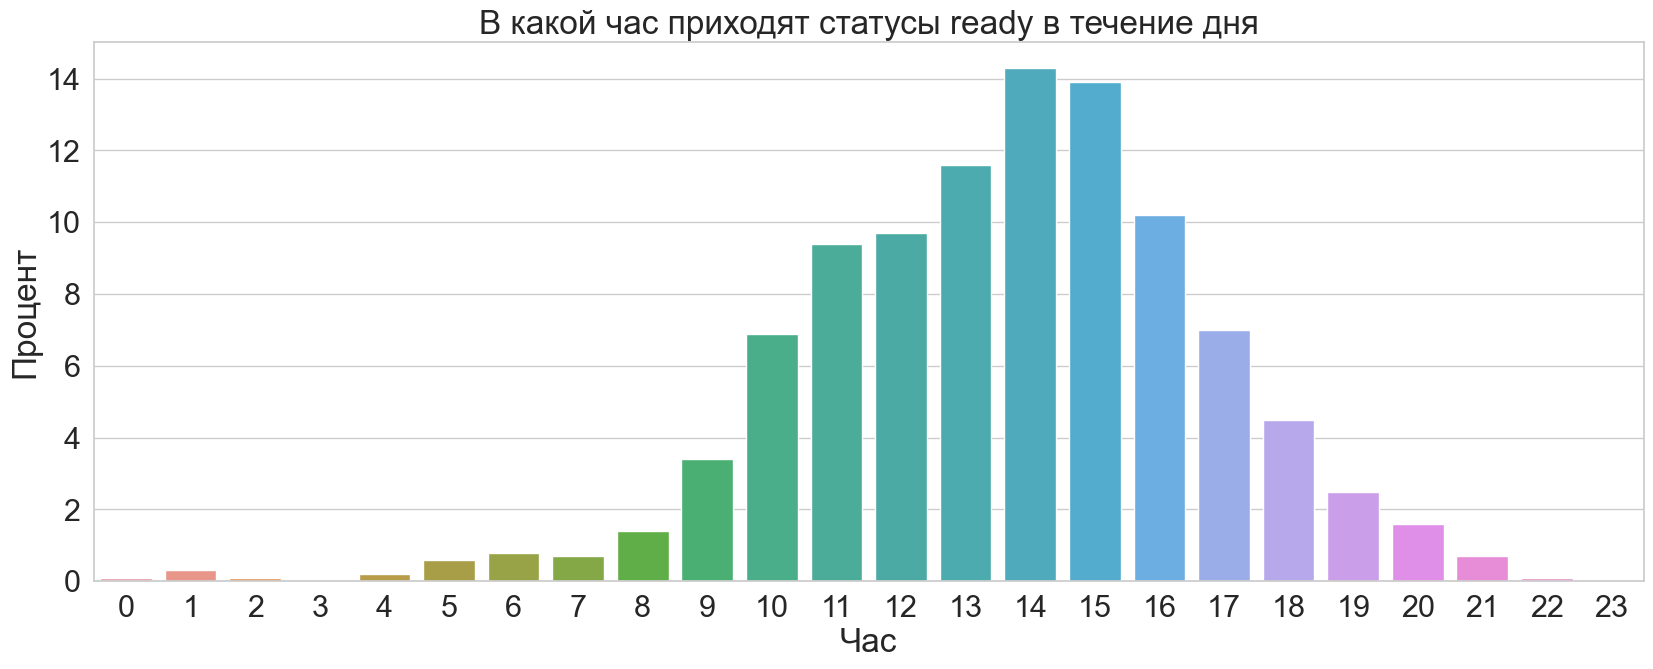

In [213]:
sns.barplot(x='hour', y='percent', data=hourly_orders)
plt.title('В какой час приходят статусы ready в течение дня')
plt.xlabel('Час')
plt.ylabel('Процент')
;

### Время между нашим 6 статусом, ready и delivery_date

In [215]:
dfomsk6 = dfomsk.merge(dfs6, how='inner', left_on='id', right_on='order_id')

In [216]:
dfomsk6 = dfomsk6.loc[:, ['marketplace_number', 'mm', 'delivery_date', 'status_time', 'er_status_time', 'innst']]

**Общее количество заказов по Мск:**

In [224]:
dfomsk6.shape[0]

14459

In [219]:
time_difference = dfomsk6.delivery_date - dfomsk6.status_time
dfomsk6['del_6'] = time_difference / pd.Timedelta(hours=1)

In [220]:
time_difference = dfomsk6.er_status_time - dfomsk6.status_time
dfomsk6['ready_6'] = time_difference / pd.Timedelta(hours=1)

In [221]:
time_difference = dfomsk6.delivery_date - dfomsk6.er_status_time
dfomsk6['del_ready'] = time_difference / pd.Timedelta(hours=1)

In [235]:
#sum(dfomsk6.del_6 < 0) / len(dfomsk6.del_6 < 0) * 100

In [236]:
#sum(dfomsk6.ready_6 < 0) / len(dfomsk6.ready_6 < 0) * 100

**Процент заказов, где статус ready пришел позже времени delivery_date:**

In [226]:
round(sum(dfomsk6.del_ready < 0) / len(dfomsk6.del_ready < 0) * 100, 1)

8.1

**Количество**

In [230]:
sum(dfomsk6.del_ready < 0)

1165

Для этих заказов можно посмотреть соотношение времени 6 статуса, ready и delivery_date.

''

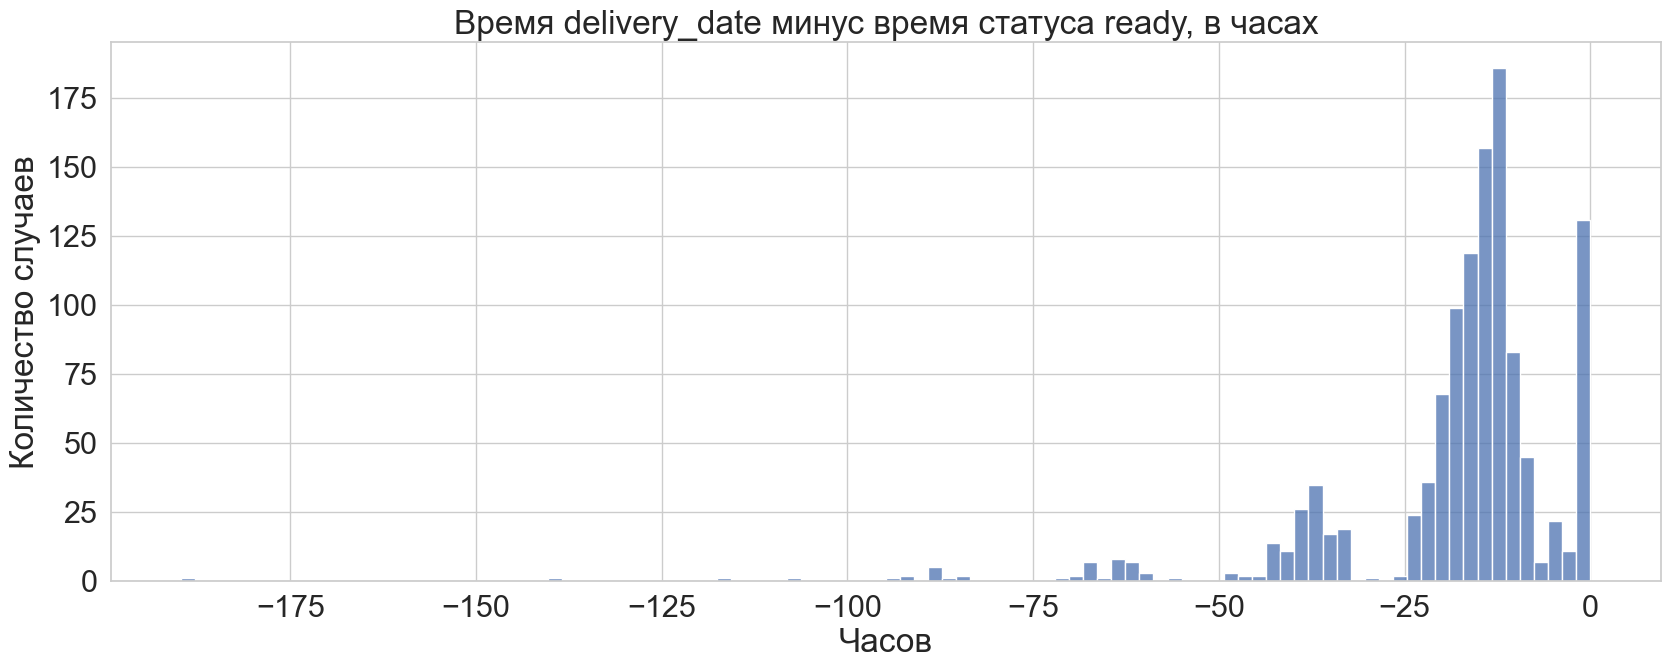

In [233]:
sns.histplot(dfomsk6[dfomsk6.del_ready < 0].del_ready, bins=100)
plt.title('Время delivery_date минус время статуса ready, в часах')
plt.xlabel('Часов')
plt.ylabel('Количество случаев')
;

''

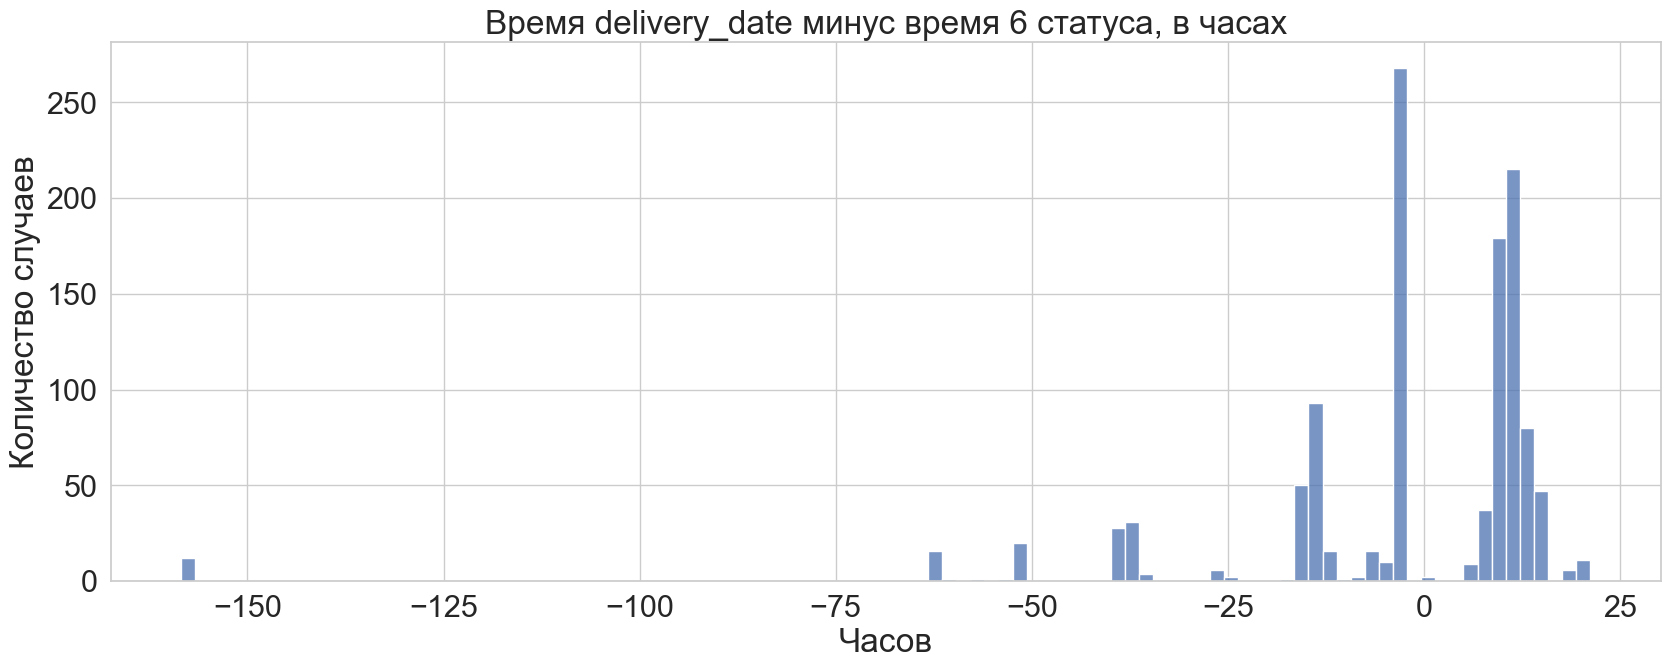

In [234]:
sns.histplot(dfomsk6[dfomsk6.del_ready < 0].del_6, bins=100)
plt.title('Время delivery_date минус время 6 статуса, в часах')
plt.xlabel('Часов')
plt.ylabel('Количество случаев')
;

Видно, что у части из этих заказов 6 статус пришел тоже позже времени delivery_date. То есть можно предположить, что это не вина ТВЗ, а заказ отправили позже, чем нужно.

Можно выделить **только заказы, где 6 статус пришел раньше, чем delivery_date, а статус ready позже**. Таких заказов меньше 4% от всех.

''

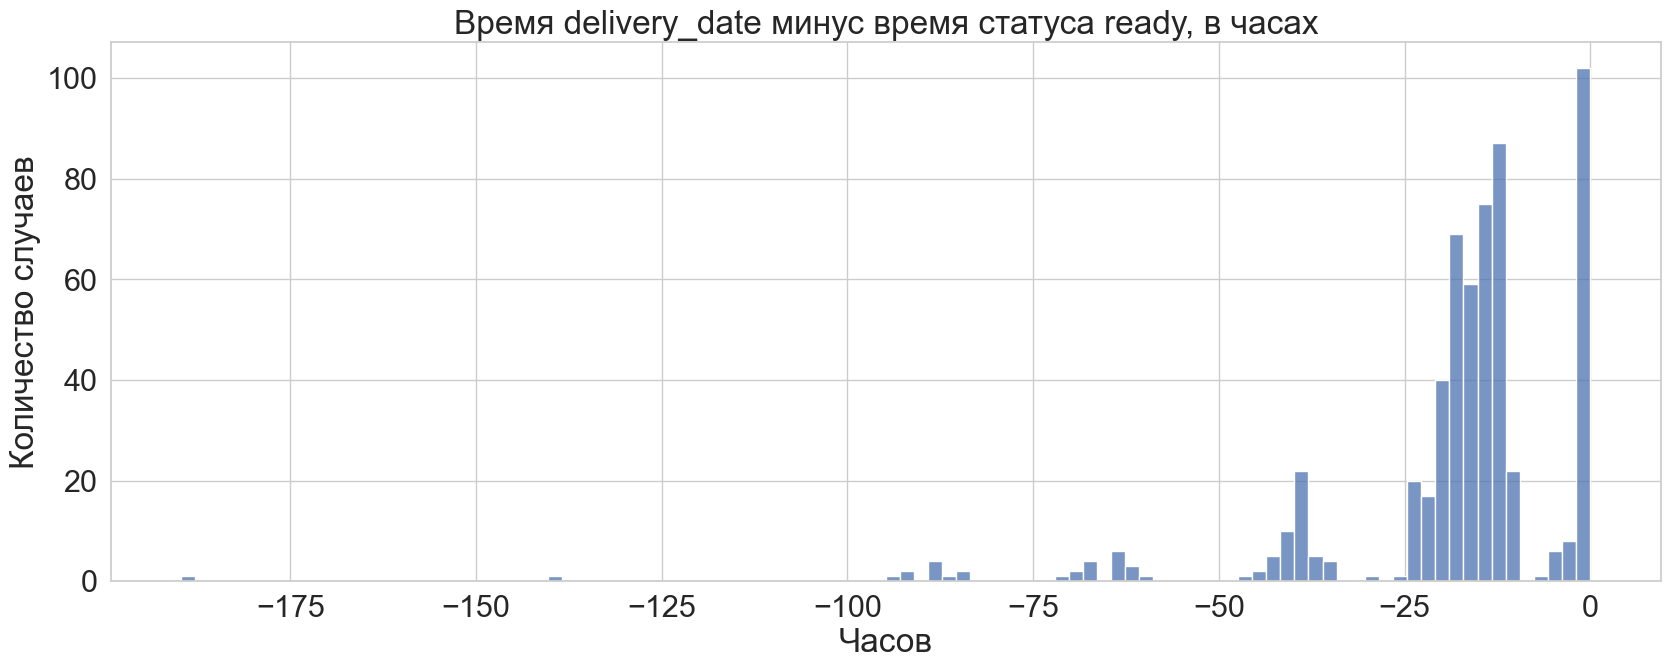

In [242]:
sns.histplot(dfomsk6[(dfomsk6.del_ready < 0) & (dfomsk6.del_6 > 0)].del_ready, bins=100)
plt.title('Время delivery_date минус время статуса ready, в часах')
plt.xlabel('Часов')
plt.ylabel('Количество случаев')
;

''

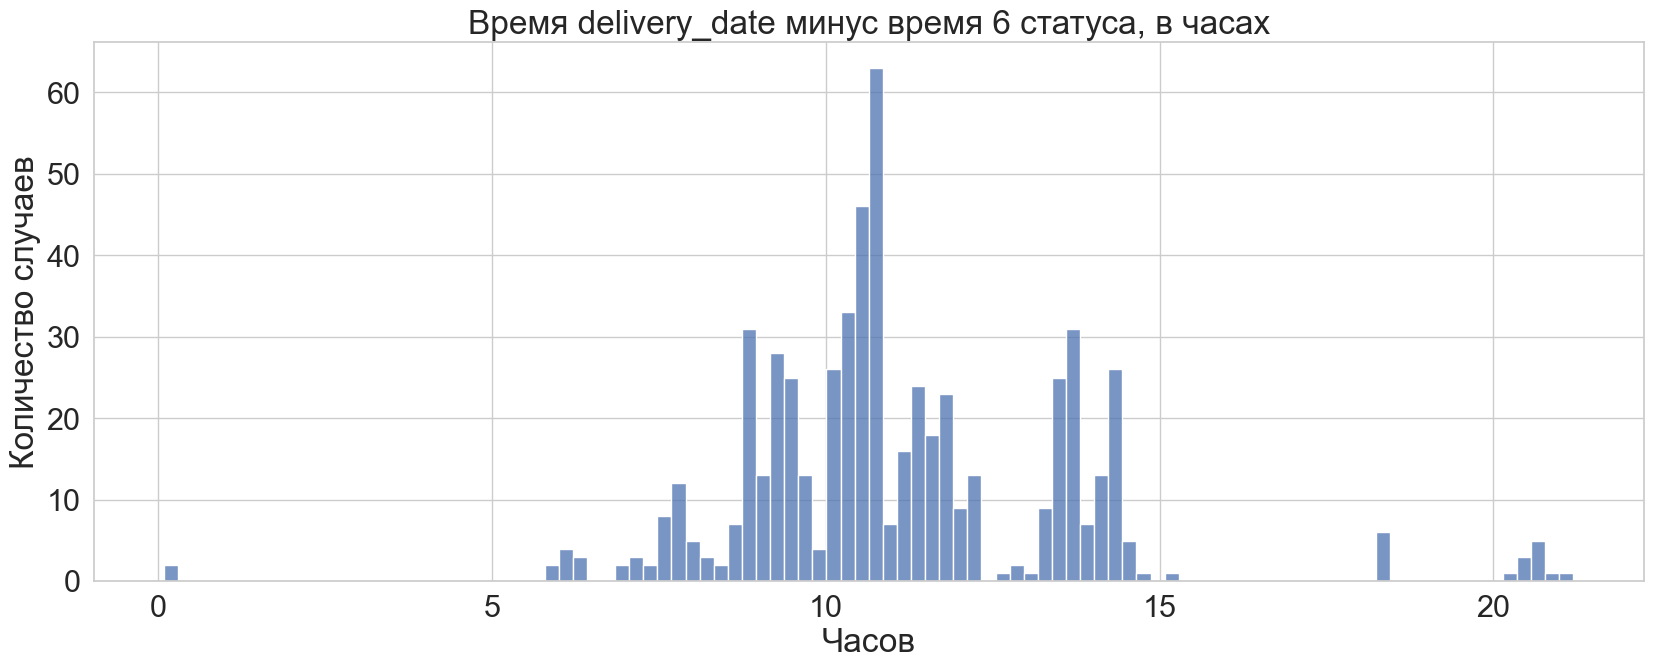

In [240]:
sns.histplot(dfomsk6[(dfomsk6.del_ready < 0) & (dfomsk6.del_6 > 0)].del_6, bins=100)
plt.title('Время delivery_date минус время 6 статуса, в часах')
plt.xlabel('Часов')
plt.ylabel('Количество случаев')
;

## Эркафарм 71 (альтернативный вариант)

In [48]:
dfo_erka = dfo_erka.loc[:, ['id', 'marketplace_number', 'mm', 'rk', 'innst', 'created', 'sys_status']]
dfo_erka

,id,marketplace_number,mm,rk,innst,created,sys_status
13,7672428,76546945,Ютека,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-30 21:56:37,11.0
14,7672371,76546899,Ютека,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-30 21:55:57,11.0
48,7575443,76313258,Ютека,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-28 16:48:21,7.0
187,6424355,13981,ОК Аптека,"ООО ""ФК ПУЛЬС""",7714456627.0,2023-11-02 14:05:22,11.0
286,7664387,76526409,Ютека,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-30 18:27:17,7.0
...,...,...,...,...,...,...,...
20522,1589507,1128211309,АптекаФорте,"ООО ""ПУЛЬС СПб""",7802611649.0,2023-11-30 21:01:05,NaN
20534,1589520,1128211318,АптекаФорте,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-30 21:12:04,NaN
20572,1589559,1128211343,АптекаФорте,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-30 22:17:04,NaN
20575,1589562,1128211345,АптекаФорте,"ООО ""ПУЛЬС СПб""",7802611649.0,2023-11-30 22:28:03,NaN


In [49]:
dfom = dfo_erka.merge(erka71, how='inner', left_on='marketplace_number', right_on='er_order_id')
dfom

,id,marketplace_number,mm,rk,innst,created,sys_status,er_order_id,er_status,er_status_time
0,7575443,76313258,Ютека,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-28 16:48:21,7.0,76313258,Собрали заказ / Оттправили Ready,2023-11-29 13:42:26
1,6424355,13981,ОК Аптека,"ООО ""ФК ПУЛЬС""",7714456627.0,2023-11-02 14:05:22,11.0,13981,Собрали заказ / Оттправили Ready,2023-11-03 10:25:04
2,7658379,76508541,Ютека,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-30 15:42:13,7.0,76508541,Собрали заказ / Оттправили Ready,2023-12-01 15:18:36
3,7262777,339316125,ЯндексDBS,"ООО ""ПУЛЬС СПб""",7802634533.0,2023-11-20 18:26:14,9.0,339316125,Собрали заказ / Оттправили Ready,2023-11-21 14:35:05
4,7352813,341144624,ЯндексDBS,"ООО ""ПУЛЬС СПб""",7802611649.0,2023-11-22 19:50:54,9.0,341144624,Собрали заказ / Оттправили Ready,2023-11-23 15:25:08
...,...,...,...,...,...,...,...,...,...,...
30095,1588879,112085236,АптекаФорте,"ООО ""ПУЛЬС Брянск""",7701047916.0,2023-11-30 11:31:27,NaN,112085236,Собрали заказ / Оттправили Ready,2023-12-01 11:22:12
30096,1588928,1128210916,АптекаФорте,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-30 12:14:03,NaN,1128210916,Собрали заказ / Оттправили Ready,2023-12-01 11:05:25
30097,1588932,1128210920,АптекаФорте,"ООО ""ПУЛЬС Казань""",6453153535.0,2023-11-30 12:14:04,NaN,1128210920,Собрали заказ / Оттправили Ready,2023-12-01 12:23:33
30098,1588991,1128210962,АптекаФорте,"ООО ""ФК ПУЛЬС""",7714456627.0,2023-11-30 12:58:03,NaN,1128210962,Собрали заказ / Оттправили Ready,2023-12-01 05:58:16


In [50]:
dfs71.source.value_counts(dropna=False)

СОММ    428880
NaN     301237
ТВЗ     150941
СБИС     67527
Name: source, dtype: int64

In [65]:
dfom

,id,marketplace_number,mm,rk,innst,created,sys_status,er_order_id,er_status,er_status_time
0,7575443,76313258,Ютека,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-28 16:48:21,7.0,76313258,Собрали заказ / Оттправили Ready,2023-11-29 13:42:26
1,6424355,13981,ОК Аптека,"ООО ""ФК ПУЛЬС""",7714456627.0,2023-11-02 14:05:22,11.0,13981,Собрали заказ / Оттправили Ready,2023-11-03 10:25:04
2,7658379,76508541,Ютека,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-30 15:42:13,7.0,76508541,Собрали заказ / Оттправили Ready,2023-12-01 15:18:36
3,7262777,339316125,ЯндексDBS,"ООО ""ПУЛЬС СПб""",7802634533.0,2023-11-20 18:26:14,9.0,339316125,Собрали заказ / Оттправили Ready,2023-11-21 14:35:05
4,7352813,341144624,ЯндексDBS,"ООО ""ПУЛЬС СПб""",7802611649.0,2023-11-22 19:50:54,9.0,341144624,Собрали заказ / Оттправили Ready,2023-11-23 15:25:08
...,...,...,...,...,...,...,...,...,...,...
30095,1588879,112085236,АптекаФорте,"ООО ""ПУЛЬС Брянск""",7701047916.0,2023-11-30 11:31:27,NaN,112085236,Собрали заказ / Оттправили Ready,2023-12-01 11:22:12
30096,1588928,1128210916,АптекаФорте,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-30 12:14:03,NaN,1128210916,Собрали заказ / Оттправили Ready,2023-12-01 11:05:25
30097,1588932,1128210920,АптекаФорте,"ООО ""ПУЛЬС Казань""",6453153535.0,2023-11-30 12:14:04,NaN,1128210920,Собрали заказ / Оттправили Ready,2023-12-01 12:23:33
30098,1588991,1128210962,АптекаФорте,"ООО ""ФК ПУЛЬС""",7714456627.0,2023-11-30 12:58:03,NaN,1128210962,Собрали заказ / Оттправили Ready,2023-12-01 05:58:16


In [63]:
dfs71

,order_id,status,source,status_time
32,6275491,71,ТВЗ,2023-10-31 11:27:54.242
33,6277597,71,ТВЗ,2023-10-31 11:27:58.886
36,6230789,71,ТВЗ,2023-10-31 11:27:56.436
45,6300592,71,ТВЗ,2023-10-31 11:27:58.653
48,6293677,71,ТВЗ,2023-10-31 11:27:58.372
...,...,...,...,...
179274,1584874,71,NaN,2023-11-27 18:31:50.000
179276,1584787,71,NaN,2023-11-27 18:31:51.000
179278,1584346,71,NaN,2023-11-27 18:31:51.000
179279,1583752,71,NaN,2023-11-27 18:31:51.000


In [51]:
dfom_full = dfom.merge(dfs71[dfs71.source == 'ТВЗ'], how='left', left_on='id', right_on='order_id')

In [52]:
dfom_nf = dfom_full[dfom_full.order_id.isna()]
dfom_nf.head(5)

,id,marketplace_number,mm,rk,innst,created,sys_status,er_order_id,er_status,er_status_time,order_id,status,source,status_time
0,7575443,76313258,Ютека,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-28 16:48:21,7.0,76313258,Собрали заказ / Оттправили Ready,2023-11-29 13:42:26,NaN,NaN,NaN,NaT
2,7658379,76508541,Ютека,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-30 15:42:13,7.0,76508541,Собрали заказ / Оттправили Ready,2023-12-01 15:18:36,NaN,NaN,NaN,NaT
3,7262777,339316125,ЯндексDBS,"ООО ""ПУЛЬС СПб""",7802634533.0,2023-11-20 18:26:14,9.0,339316125,Собрали заказ / Оттправили Ready,2023-11-21 14:35:05,NaN,NaN,NaN,NaT
4,7352813,341144624,ЯндексDBS,"ООО ""ПУЛЬС СПб""",7802611649.0,2023-11-22 19:50:54,9.0,341144624,Собрали заказ / Оттправили Ready,2023-11-23 15:25:08,NaN,NaN,NaN,NaT
5,6511829,74230410,Ютека,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-04 21:26:07,7.0,74230410,Собрали заказ / Оттправили Ready,2023-11-06 11:55:07,NaN,NaN,NaN,NaT


In [53]:
# Merge the two dataframes on the order_id fields
merged_df = pd.merge(
    left=dfom_nf.iloc[:, :10],
    right=dfs,
    left_on='id',
    right_on='order_id',
    how='inner'
)

In [54]:
merged_df.head(3)

,id,marketplace_number,mm,rk,innst,created,sys_status,er_order_id,er_status,er_status_time,order_id,status,source,status_time
0,7575443,76313258,Ютека,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-28 16:48:21,7.0,76313258,Собрали заказ / Оттправили Ready,2023-11-29 13:42:26,7575443,6,NaN,2023-11-30 12:41:38.133
1,7575443,76313258,Ютека,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-28 16:48:21,7.0,76313258,Собрали заказ / Оттправили Ready,2023-11-29 13:42:26,7575443,7,NaN,2023-11-30 18:04:23.779
2,7575443,76313258,Ютека,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-28 16:48:21,7.0,76313258,Собрали заказ / Оттправили Ready,2023-11-29 13:42:26,7575443,1,NaN,2023-11-28 13:48:51.947


In [55]:
merged_df.shape

(31197, 14)

In [56]:
# Filter rows where status_time is less or equal to er_status_time
filtered_df = merged_df[merged_df['status_time'] <= merged_df['er_status_time']]

# Sort by order_id and status_time descending
sorted_df = filtered_df.sort_values(by=['order_id', 'status_time'], ascending=[True, False])

In [57]:
sorted_df.head(3)

,id,marketplace_number,mm,rk,innst,created,sys_status,er_order_id,er_status,er_status_time,order_id,status,source,status_time
25935,1566921,1128199184,АптекаФорте,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-01 02:18:03,NaN,1128199184,Собрали заказ / Оттправили Ready,2023-11-03 09:45:03,1566921,71,NaN,2023-11-03 09:30:05
25934,1566921,1128199184,АптекаФорте,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-01 02:18:03,NaN,1128199184,Собрали заказ / Оттправили Ready,2023-11-03 09:45:03,1566921,6,NaN,2023-11-03 09:24:10
25936,1566921,1128199184,АптекаФорте,"ООО ""ФК ПУЛЬС""",7701047916.0,2023-11-01 02:18:03,NaN,1128199184,Собрали заказ / Оттправили Ready,2023-11-03 09:45:03,1566921,5,NaN,2023-11-02 19:44:18


In [58]:
# Group by order_id and take the first occurrence
last_status_df = sorted_df.groupby('order_id').first().reset_index()

# Select only the necessary columns
last_status_df = last_status_df[['order_id', 'marketplace_number', 'mm', 'rk', 'status', 'status_time', 'source', 'innst', 'sys_status']]

last_status_df

,order_id,marketplace_number,mm,rk,status,status_time,source,innst,sys_status
0,1566921,1128199184,АптекаФорте,"ООО ""ФК ПУЛЬС""",71,2023-11-03 09:30:05.000,None,7701047916.0,NaN
1,1566947,1128199197,АптекаФорте,"ООО ""ПУЛЬС СПб""",71,2023-11-02 09:00:09.000,None,7802634533.0,NaN
2,1566949,1128199198,АптекаФорте,"ООО ""ПУЛЬС СПб""",71,2023-11-02 09:00:08.000,None,7802634533.0,NaN
3,1566970,1128199210,АптекаФорте,"ООО ""ПУЛЬС Новосибирск""",71,2023-11-03 19:00:12.000,None,5402036790.0,NaN
4,1566996,1128199218,АптекаФорте,"ООО ""ПУЛЬС Новосибирск""",71,2023-11-02 05:00:04.000,None,5402036790.0,NaN
...,...,...,...,...,...,...,...,...,...
4269,7673794,07349576-0347-1,Озон RFBS,"ООО ""ФК ПУЛЬС""",5,2023-11-30 23:08:00.666,None,7714456627.0,11.0
4270,7674235,76550820,Ютека,"ООО ""ФК ПУЛЬС""",5,2023-11-30 22:54:31.268,None,7714456627.0,9.0
4271,7674547,96400721-0075-1,Озон RFBS,"ООО ""ФК ПУЛЬС""",5,2023-11-30 22:50:51.511,None,7713059634.0,11.0
4272,7674618,76551526,Ютека,"ООО ""ФК ПУЛЬС""",5,2023-11-30 21:57:00.408,None,7701047916.0,11.0


In [59]:
last_status_df.status.value_counts(dropna=False)

5      2618
71     1362
6       171
7        55
400      51
8        13
9         1
10        1
11        1
13        1
Name: status, dtype: int64

In [60]:
last_status_df.status.value_counts(normalize=True).round(4) * 100

5      61.25
71     31.87
6       4.00
7       1.29
400     1.19
8       0.30
9       0.02
10      0.02
11      0.02
13      0.02
Name: status, dtype: float64

In [68]:
last_status_df[last_status_df.status == 5].sys_status.value_counts()

9.0     1638
11.0     816
7.0       43
10.0      32
5.0       10
Name: sys_status, dtype: int64

In [122]:
last_status_df[last_status_df.status == 71].mm.value_counts()

ЯндексDBS         593
Ютека             140
Озон RFBS          36
Сбермегамаркет     13
Все аптеки          9
Name: mm, dtype: int64

In [62]:
last_status_df[last_status_df.status == 71]

,order_id,marketplace_number,mm,rk,status,status_time,source,innst,sys_status
0,1566921,1128199184,АптекаФорте,"ООО ""ФК ПУЛЬС""",71,2023-11-03 09:30:05.000,None,7701047916.0,NaN
1,1566947,1128199197,АптекаФорте,"ООО ""ПУЛЬС СПб""",71,2023-11-02 09:00:09.000,None,7802634533.0,NaN
2,1566949,1128199198,АптекаФорте,"ООО ""ПУЛЬС СПб""",71,2023-11-02 09:00:08.000,None,7802634533.0,NaN
3,1566970,1128199210,АптекаФорте,"ООО ""ПУЛЬС Новосибирск""",71,2023-11-03 19:00:12.000,None,5402036790.0,NaN
4,1566996,1128199218,АптекаФорте,"ООО ""ПУЛЬС Новосибирск""",71,2023-11-02 05:00:04.000,None,5402036790.0,NaN
...,...,...,...,...,...,...,...,...,...
4173,7653868,76493760,Ютека,"ООО ""ПУЛЬС Екатеринбург""",71,2023-12-01 07:01:31.342,СОММ,7203431140.0,9.0
4223,7662696,346486038,ЯндексDBS,"ООО ""ПУЛЬС Самара""",71,2023-11-30 22:31:31.518,СОММ,6451128364.0,9.0
4229,7663651,346501584,ЯндексDBS,"ООО ""ПУЛЬС Ярославль""",71,2023-12-01 09:00:24.846,СОММ,5258139119.0,9.0
4237,7665100,346522738,ЯндексDBS,"ООО ""ПУЛЬС Ярославль""",71,2023-12-01 09:00:24.793,СОММ,5258139119.0,9.0


In [124]:
last_status_df

,order_id,marketplace_number,mm,rk,status,status_time,source,innst,sys_status
0,6357065,73897707,Ютека,"ООО ""ПУЛЬС Ярославль""",71,2023-11-02 09:01:40.299,СОММ,6453153535.0,9.0
1,6359265,323711924,ЯндексDBS,"ООО ""ПУЛЬС СПб""",71,2023-11-02 09:30:15.892,СОММ,7802611649.0,9.0
2,6360865,323732083,ЯндексDBS,"ООО ""ПУЛЬС СПб""",71,2023-11-02 09:00:51.749,СОММ,4703148953.0,9.0
3,6363221,46831899-0005-1,Озон RFBS,"ООО ""ФК ПУЛЬС""",6,2023-11-03 09:54:56.449,None,7701047916.0,9.0
4,6367404,323766740,ЯндексDBS,"ООО ""ПУЛЬС СПб""",71,2023-11-02 09:00:51.667,СОММ,4703148953.0,9.0
...,...,...,...,...,...,...,...,...,...
3517,7673794,07349576-0347-1,Озон RFBS,"ООО ""ФК ПУЛЬС""",5,2023-11-30 23:08:00.666,None,7714456627.0,11.0
3518,7674235,76550820,Ютека,"ООО ""ФК ПУЛЬС""",5,2023-11-30 22:54:31.268,None,7714456627.0,9.0
3519,7674547,96400721-0075-1,Озон RFBS,"ООО ""ФК ПУЛЬС""",5,2023-11-30 22:50:51.511,None,7713059634.0,11.0
3520,7674618,76551526,Ютека,"ООО ""ФК ПУЛЬС""",5,2023-11-30 21:57:00.408,None,7701047916.0,11.0


In [132]:
last_status_df.to_excel('output_erka71_.xlsx', index=False)

In [67]:
last_status_df[last_status_df.mm != 'АптекаФорте'].status.value_counts(dropna=False)

5      2539
71      791
6        72
7        52
400      51
8        13
9         1
10        1
11        1
13        1
Name: status, dtype: int64

In [66]:
last_status_df[last_status_df.mm != 'АптекаФорте'].status.value_counts(normalize=True).round(4) * 100

5      72.09
71     22.46
6       2.04
7       1.48
400     1.45
8       0.37
9       0.03
10      0.03
11      0.03
13      0.03
Name: status, dtype: float64

In [109]:
erka71[erka71.er_order_id == '346522738']

,er_order_id,er_status,er_status_time
120841,346522738,Собрали заказ / Оттправили Ready,2023-12-01 16:40:00


## Эркафарм 71

In [145]:
dfo_erka71 = dfo_erka.merge(dfs71, how='left', left_on='id', right_on='order_id')

In [146]:
dfo_erka71 = dfo_erka71.drop_duplicates(subset=['id'], keep='first')

In [147]:
dfo_erka71.shape

(30831, 11)

In [148]:
dfo_erka71.id.nunique()

30831

In [149]:
# есть 50 дублей, очевидно из-за того, что статусы по 2 раза приходят. на общие цифры не повлияет, все равно уникальные считаю

In [150]:
dfo_erka71 = dfo_erka71.merge(erka71, how='left', left_on='marketplace_number', right_on='er_order_id')

In [151]:
dfo_erka71 = dfo_erka71.drop_duplicates(subset=['id'], keep='first')

In [152]:
# есть еще 10 дублей, хз почему

In [153]:
dfo_erka71.source.value_counts(dropna=False)

ТВЗ     26109
NaN      3876
СОММ      830
СБИС       16
Name: source, dtype: int64

In [154]:
dfo_erka71['is_source_tvz'] = dfo_erka71.source == 'ТВЗ'
dfo_erka71['is_source_somm'] = dfo_erka71.source == 'СОММ'
dfo_erka71['is_source_sbis'] = dfo_erka71.source == 'СБИС'
dfo_erka71['is_source_null'] = (dfo_erka71.source.isna()) & (~dfo_erka71.status.isna())
dfo_erka71['no_status'] = dfo_erka71.status.isna()

In [156]:
# dfo_erka71[(dfo_erka71.is_source_tvz + dfo_erka71.is_source_somm + dfo_erka71.is_source_sbis + 
#                    dfo_erka71.is_source_null + dfo_erka71.no_status) == 1]

In [157]:
dfo_erka71_mm = dfo_erka71.groupby('mm', as_index=False) \
                        .agg({'id': 'nunique', 
                              'is_source_tvz': 'sum',
                              'is_source_somm': 'sum',
                              'is_source_sbis': 'sum',
                              'is_source_null': 'sum',
                              'no_status': 'sum', 
                           'order_id': 'nunique', 
                           'er_order_id': 'nunique'})

In [158]:
dfo_erka71_mm['percent'] = round(dfo_erka71_mm.order_id / dfo_erka71_mm.er_order_id * 100, 0)

In [159]:
dfo_erka71_mm

,mm,id,is_source_tvz,is_source_somm,is_source_sbis,is_source_null,no_status,order_id,er_order_id,percent
0,АптекаФорте,782,0,0,0,0,782,0,752,0.0
1,Все аптеки,743,659,9,0,0,75,668,720,93.0
2,ОК Аптека,22,21,0,0,0,1,21,21,100.0
3,Озон RFBS,6728,5879,38,0,0,811,5917,6550,90.0
4,Сбермегамаркет,894,817,14,0,0,63,831,876,95.0
5,Ютека,20783,18507,141,1,1,2133,18650,20305,92.0
6,ЯндексDBS,879,226,628,15,10,0,879,867,101.0


In [160]:
dfo_erka71_rk = dfo_erka71.groupby('rk', as_index=False).agg({'id': 'nunique', 
                                                              'is_source_tvz': 'sum',
                              'is_source_somm': 'sum',
                              'is_source_sbis': 'sum',
                              'is_source_null': 'sum',
                              'no_status': 'sum', 
                                               'order_id': 'nunique', 
                                               'er_order_id': 'nunique'})
dfo_erka71_rk['percent'] = round(dfo_erka71_rk.order_id / dfo_erka71_rk.er_order_id * 100, 0)

In [161]:
dfo_erka71_rk

,rk,id,is_source_tvz,is_source_somm,is_source_sbis,is_source_null,no_status,order_id,er_order_id,percent
0,"ООО ""ПУЛЬС Брянск""",473,457,6,0,0,10,463,462,100.0
1,"ООО ""ПУЛЬС Волгоград""",1376,1299,39,0,0,38,1338,1373,97.0
2,"ООО ""ПУЛЬС Воронеж""",109,97,6,1,0,5,104,107,97.0
3,"ООО ""ПУЛЬС Екатеринбург""",123,35,88,0,0,0,123,122,101.0
4,"ООО ""ПУЛЬС Казань""",149,34,63,0,1,51,98,148,66.0
5,"ООО ""ПУЛЬС Краснодар""",632,572,35,0,1,24,608,623,98.0
6,"ООО ""ПУЛЬС Красноярск""",88,81,0,0,0,7,81,84,96.0
7,"ООО ""ПУЛЬС Новосибирск""",1539,1455,15,0,0,69,1470,1489,99.0
8,"ООО ""ПУЛЬС СПб""",9765,9027,292,0,4,442,9323,9608,97.0
9,"ООО ""ПУЛЬС Самара""",168,158,3,0,0,7,161,168,96.0


In [162]:
dfo_erka71_dd = dfo_erka71.groupby(dfo_erka71.created.dt.date) \
                        .agg({'id': 'nunique', 
                              'is_source_tvz': 'sum',
                              'is_source_somm': 'sum',
                              'is_source_sbis': 'sum',
                              'is_source_null': 'sum',
                              'no_status': 'sum', 
                           'order_id': 'nunique', 
                           'er_order_id': 'nunique'})
dfo_erka71_dd['percent'] = round(dfo_erka71_dd.order_id / dfo_erka71_dd.er_order_id * 100, 0)

In [163]:
dfo_erka71_dd

,id,is_source_tvz,is_source_somm,is_source_sbis,is_source_null,no_status,order_id,er_order_id,percent
created,,,,,,,,,
2023-11-01,534,490,19,0,0,25,509,533,95.0
2023-11-02,833,783,12,1,0,37,796,828,96.0
2023-11-03,1113,1013,21,0,0,79,1034,1111,93.0
2023-11-04,805,627,10,0,0,168,637,803,79.0
2023-11-05,863,679,26,2,0,156,707,861,82.0
2023-11-06,1094,830,30,1,0,233,861,1094,79.0
2023-11-07,1284,1133,40,0,0,111,1173,1279,92.0
2023-11-08,1250,1132,43,0,0,75,1175,1248,94.0
2023-11-09,1244,1044,28,0,0,172,1072,1242,86.0


## Эркафарм 9

In [164]:
dfo_erka9 = dfo_erka.merge(dfs9, how='left', left_on='id', right_on='order_id')

In [165]:
dfo_erka9 = dfo_erka9.drop_duplicates(subset=['id'], keep='first')

In [166]:
dfo_erka9.shape

(30831, 11)

In [167]:
# есть 50 дублей, очевидно из-за того, что статусы по 2 раза приходят

In [168]:
dfo_erka9 = dfo_erka9.merge(erka9, how='left', left_on='marketplace_number', right_on='er_order_id')

In [169]:
dfo_erka9 = dfo_erka9.drop_duplicates(subset=['id'], keep='first')

In [170]:
# есть еще 10 дублей, хз почему

In [171]:
dfo_erka9['is_source_tvz'] = dfo_erka9.source == 'ТВЗ'

In [172]:
dfo_erka9['is_source_tvz'] = dfo_erka9.source == 'ТВЗ'
dfo_erka9['is_source_somm'] = dfo_erka9.source == 'СОММ'
dfo_erka9['is_source_sbis'] = dfo_erka9.source == 'СБИС'
dfo_erka9['is_source_null'] = (dfo_erka9.source.isna()) & (~dfo_erka9.status.isna())
dfo_erka9['no_status'] = dfo_erka9.status.isna()

In [173]:
dfo_erka9_mm = dfo_erka9.groupby('mm', as_index=False) \
                        .agg({'marketplace_number': 'nunique', 
                              'is_source_tvz': 'sum',
                              'is_source_somm': 'sum',
                              'is_source_sbis': 'sum',
                              'is_source_null': 'sum',
                              'no_status': 'sum', 
                           'order_id': 'nunique', 
                           'er_order_id': 'nunique'})

In [174]:
dfo_erka9_mm['percent'] = round(dfo_erka9_mm.is_source_tvz / dfo_erka9_mm.er_order_id * 100, 0)

In [175]:
#dfo_erka9_mm.columns = ['mm', 'total_orders', '9_source_tvz', '9_all_sources', '9_erka', 'percent']

In [176]:
dfo_erka9_mm

,mm,marketplace_number,is_source_tvz,is_source_somm,is_source_sbis,is_source_null,no_status,order_id,er_order_id,percent
0,АптекаФорте,782,0,0,0,0,782,0,609,0.0
1,Все аптеки,743,496,46,0,32,169,574,494,100.0
2,ОК Аптека,22,15,0,0,7,0,22,14,107.0
3,Озон RFBS,6728,5019,258,0,120,1331,5397,4937,102.0
4,Сбермегамаркет,894,598,25,0,21,250,644,593,101.0
5,Ютека,20783,16294,805,0,202,3482,17301,16277,100.0
6,ЯндексDBS,879,696,26,0,32,125,754,694,100.0


In [177]:
dfo_erka9_rk = dfo_erka9.groupby('rk', as_index=False).agg({'marketplace_number': 'nunique', 
                                                            'is_source_tvz': 'sum',
                              'is_source_somm': 'sum',
                              'is_source_sbis': 'sum',
                              'is_source_null': 'sum',
                              'no_status': 'sum', 
                                               'order_id': 'nunique', 
                                               'er_order_id': 'nunique'})
dfo_erka9_rk['percent'] = round(dfo_erka9_rk.is_source_tvz / dfo_erka9_rk.er_order_id * 100, 0)

In [178]:
#dfo_erka9_rk.columns = ['mm', 'total_orders', '9_source_tvz', '9_all_sources', '9_erka', 'percent']

In [179]:
dfo_erka9_rk

,rk,marketplace_number,is_source_tvz,is_source_somm,is_source_sbis,is_source_null,no_status,order_id,er_order_id,percent
0,"ООО ""ПУЛЬС Брянск""",473,406,11,0,4,52,421,403,101.0
1,"ООО ""ПУЛЬС Волгоград""",1376,1123,11,0,12,230,1146,1147,98.0
2,"ООО ""ПУЛЬС Воронеж""",109,78,4,0,1,26,83,80,98.0
3,"ООО ""ПУЛЬС Екатеринбург""",123,93,6,0,2,22,101,93,100.0
4,"ООО ""ПУЛЬС Казань""",149,83,0,0,5,61,88,126,66.0
5,"ООО ""ПУЛЬС Краснодар""",632,469,7,0,14,142,490,481,98.0
6,"ООО ""ПУЛЬС Красноярск""",88,73,0,0,1,14,74,74,99.0
7,"ООО ""ПУЛЬС Новосибирск""",1539,1227,41,0,24,247,1292,1219,101.0
8,"ООО ""ПУЛЬС СПб""",9765,7518,185,0,187,1875,7890,7616,99.0
9,"ООО ""ПУЛЬС Самара""",168,132,1,0,5,30,138,139,95.0


In [180]:
dfo_erka9_dd = dfo_erka9.groupby(dfo_erka9.created.dt.date) \
                        .agg({'marketplace_number': 'nunique', 
                              'is_source_tvz': 'sum',
                              'is_source_somm': 'sum',
                              'is_source_sbis': 'sum',
                              'is_source_null': 'sum',
                              'no_status': 'sum', 
                           'order_id': 'nunique', 
                           'er_order_id': 'nunique'})
dfo_erka9_dd['percent'] = round(dfo_erka9_dd.is_source_tvz / dfo_erka9_dd.er_order_id * 100, 0)

In [181]:
#dfo_erka9_dd.columns = ['total_orders', '9_source_tvz', '9_all_sources', '9_erka', 'percent']

In [182]:
dfo_erka9_dd

,marketplace_number,is_source_tvz,is_source_somm,is_source_sbis,is_source_null,no_status,order_id,er_order_id,percent
created,,,,,,,,,
2023-11-01,534,431,3,0,16,84,450,445,97.0
2023-11-02,833,668,10,0,19,136,697,682,98.0
2023-11-03,1113,849,27,0,28,209,904,867,98.0
2023-11-04,805,561,29,0,17,198,607,589,95.0
2023-11-05,863,653,27,0,17,166,697,684,95.0
2023-11-06,1094,833,33,0,13,215,879,857,97.0
2023-11-07,1284,923,43,0,36,282,1002,941,98.0
2023-11-08,1250,1002,36,0,26,186,1064,1031,97.0
2023-11-09,1244,980,39,0,16,209,1035,1004,98.0


## Планета Здоровья 71

In [163]:
#dfs71 = dfs71[dfs71.source == 'ТВЗ']

In [177]:
dfo_pz71 = dfo_pz.merge(dfs71, how='left', left_on='id', right_on='order_id')

In [178]:
dfo_pz71.shape

(135264, 14)

In [179]:
# есть 50 дублей, очевидно из-за того, что статусы по 2 раза приходят

In [180]:
dfo_pz71 = dfo_pz71.merge(pz71, how='left', left_on='guid', right_on='pz_order_guid')

In [168]:
# есть еще 10 дублей, хз почему

In [169]:
dfo_pz71_mm = dfo_pz71.groupby('mm', as_index=False) \
                        .agg({'id': 'nunique', 
                           'order_id': 'nunique', 
                           'pz_order_guid': 'nunique'})

In [170]:
dfo_pz71_mm['percent'] = round(dfo_pz71_mm.order_id / dfo_pz71_mm.pz_order_guid * 100, 0)

In [171]:
dfo_pz71_mm

,mm,id,order_id,pz_order_guid,percent
0,АСНА,2209,812,1586,51.0
1,АналитФармация,2,0,0,NaN
2,АптекаФорте,2258,0,1580,0.0
3,В аптеке,241,119,134,89.0
4,Все аптеки,4266,1948,2980,65.0
5,ОК Аптека,27,16,5,320.0
6,Озон RFBS,18211,9580,13672,70.0
7,Планета Здоровья,47561,0,0,NaN
8,Сбермегамаркет,2455,1344,1702,79.0
9,ЦВА,837,487,568,86.0


In [172]:
dfo_pz71_rk = dfo_pz71.groupby('rk', as_index=False).agg({'id': 'nunique', 
                                               'order_id': 'nunique', 
                                               'pz_order_guid': 'nunique'})
dfo_pz71_rk['percent'] = round(dfo_pz71_rk.order_id / dfo_pz71_rk.pz_order_guid * 100, 0)

In [173]:
dfo_pz71_rk

,rk,id,order_id,pz_order_guid,percent
0,"ООО ""ПУЛЬС Брянск""",677,205,216,95.0
1,"ООО ""ПУЛЬС Волгоград""",523,0,0,NaN
2,"ООО ""ПУЛЬС Воронеж""",1018,0,0,NaN
3,"ООО ""ПУЛЬС Екатеринбург""",33245,8899,10530,85.0
4,"ООО ""ПУЛЬС Иркутск""",90,43,66,65.0
5,"ООО ""ПУЛЬС Казань""",14098,3480,4305,81.0
6,"ООО ""ПУЛЬС Краснодар""",2287,480,573,84.0
7,"ООО ""ПУЛЬС Новосибирск""",1200,399,417,96.0
8,"ООО ""ПУЛЬС СПб""",5358,2398,2707,89.0
9,"ООО ""ПУЛЬС Самара""",917,0,0,NaN


In [174]:
dfo_pz71_dd = dfo_pz71.groupby(dfo_pz71.created.dt.date) \
                        .agg({'id': 'nunique', 
                           'order_id': 'nunique', 
                           'pz_order_guid': 'nunique'})
dfo_pz71_dd['percent'] = round(dfo_pz71_dd.order_id / dfo_pz71_dd.pz_order_guid * 100, 0)

In [175]:
dfo_pz71_dd

,id,order_id,pz_order_guid,percent
created,,,,
2023-11-01,4710,1560,1,156000.0
2023-11-02,4897,1688,2,84400.0
2023-11-03,3847,1551,10,15510.0
2023-11-04,3377,987,13,7592.0
2023-11-05,3839,1102,15,7347.0
2023-11-06,4656,1268,28,4529.0
2023-11-07,5337,1852,127,1458.0
2023-11-08,5415,1627,593,274.0
2023-11-09,4925,1594,3290,48.0


## Планета Здоровья 9

In [180]:
dfo_pz9 = dfo_pz.merge(dfs9, how='left', left_on='id', right_on='order_id')

In [181]:
dfo_pz9.shape

(134223, 14)

In [182]:
# есть 50 дублей, очевидно из-за того, что статусы по 2 раза приходят

In [183]:
dfo_pz9 = dfo_pz9.merge(pz9, how='left', left_on='guid', right_on='pz_order_guid')

In [184]:
# есть еще 10 дублей, хз почему

In [185]:
dfo_pz9_mm = dfo_pz9.groupby('mm', as_index=False) \
                        .agg({'id': 'nunique', 
                           'order_id': 'nunique', 
                           'pz_order_guid': 'nunique'})

In [186]:
dfo_pz9_mm['percent'] = round(dfo_pz9_mm.order_id / dfo_pz9_mm.pz_order_guid * 100, 0)

In [187]:
dfo_pz9_mm

,mm,id,order_id,pz_order_guid,percent
0,АСНА,2209,1881,1329,142.0
1,АналитФармация,2,2,0,inf
2,АптекаФорте,2258,1676,1556,108.0
3,В аптеке,241,238,124,192.0
4,Все аптеки,4266,3793,2615,145.0
5,ОК Аптека,27,26,4,650.0
6,Озон RFBS,18211,16228,12492,130.0
7,Планета Здоровья,47561,37260,0,inf
8,Сбермегамаркет,2455,2268,1710,133.0
9,ЦВА,837,677,458,148.0


In [188]:
dfo_pz9_rk = dfo_pz9.groupby('rk', as_index=False).agg({'id': 'nunique', 
                                               'order_id': 'nunique', 
                                               'pz_order_guid': 'nunique'})
dfo_pz9_rk['percent'] = round(dfo_pz9_rk.order_id / dfo_pz9_rk.pz_order_guid * 100, 0)

In [189]:
dfo_pz9_rk

,rk,id,order_id,pz_order_guid,percent
0,"ООО ""ПУЛЬС Брянск""",677,581,212,274.0
1,"ООО ""ПУЛЬС Волгоград""",523,419,0,inf
2,"ООО ""ПУЛЬС Воронеж""",1018,811,0,inf
3,"ООО ""ПУЛЬС Екатеринбург""",33245,28047,9906,283.0
4,"ООО ""ПУЛЬС Иркутск""",90,89,73,122.0
5,"ООО ""ПУЛЬС Казань""",14098,11912,4079,292.0
6,"ООО ""ПУЛЬС Краснодар""",2287,1835,515,356.0
7,"ООО ""ПУЛЬС Новосибирск""",1200,997,373,267.0
8,"ООО ""ПУЛЬС СПб""",5358,4628,2503,185.0
9,"ООО ""ПУЛЬС Самара""",917,689,0,inf


In [190]:
dfo_pz9_dd = dfo_pz9.groupby(dfo_pz9.created.dt.date) \
                        .agg({'id': 'nunique', 
                           'order_id': 'nunique', 
                           'pz_order_guid': 'nunique'})
dfo_pz9_dd['percent'] = round(dfo_pz9_dd.order_id / dfo_pz9_dd.pz_order_guid * 100, 0)

In [191]:
dfo_pz9_dd

,id,order_id,pz_order_guid,percent
created,,,,
2023-11-01,4710,4164,222,1876.0
2023-11-02,4897,4286,254,1687.0
2023-11-03,3847,3412,353,967.0
2023-11-04,3377,2908,351,828.0
2023-11-05,3839,3363,371,906.0
2023-11-06,4656,4103,511,803.0
2023-11-07,5337,4614,989,467.0
2023-11-08,5415,4748,1866,254.0
2023-11-09,4925,4333,2930,148.0


## Дальше можно не смотреть

In [ ]:
# unique_order_ids_df1 = erka['order_id'].unique()
# # Проверяем, содержатся ли эти уникальные значения во втором DataFrame
# mask = ~erka['order_id'].isin(df['marketplace_number'])

# # Используем маску для вывода уникальных order_id из df1, которых нет в df2
# missing_order_ids = erka.loc[mask, 'order_id'].unique()
# missing_order_ids

In [ ]:
dfo = pd.read_csv('https://redash.puls.ru/api/queries/8527/results.csv?api_key=04tKaxPAJfcexTsRwuWOfIFH7Xc1e8zAxoemdYja')
dfo.shape

In [ ]:
dfmp = dfmpp.merge(dfo, how='inner', left_on='order_id', right_on='id') \
        .loc[:, ['order_id', 'marketplace', 'rk', 'status', 'status_time']]  \
        .sort_values(by=['order_id', 'status_time'])

In [ ]:
dfmp

In [ ]:
# Создание столбца filtered_status (4 минут)
dfmp['filtered_status'] = dfmp.groupby('order_id')['status'].transform(lambda x: x.ne(x.shift()))

In [ ]:
dfmp = dfmp[dfmp['filtered_status'] == True]

In [ ]:
#dfmp['filtered_status'] = dfmp['status'].where(dfmp['filtered_status'] > 0, None)

In [ ]:
dfmp.status = dfmp.status.astype('str')

In [ ]:
# Группировка и агрегирование 
grouped_dfmp = dfmp.groupby(['order_id', 'marketplace', 'rk'], as_index=False).agg({'status': lambda x: ','.join(x)})

In [ ]:
#grouped_dfmp

In [ ]:
#grouped_dfmp[grouped_dfmp.status.str.contains(',81')]

In [ ]:
grouped_dfmp2 = grouped_dfmp.groupby(['status', 'marketplace', 'rk']).size().reset_index(name='num')

In [ ]:
grouped_dfmp2.num.sum()

In [ ]:
grouped_dfmp2

In [ ]:
# dfm = grouped_df.groupby('status').size().reset_index(name='num')
# dfm.sort_values('num', ascending=False).head(300)

In [ ]:
# dfm.columns = df.columns

In [ ]:
# # Преобразование строки статусов в список целых чисел
# dfm['status_sequence'] = dfm['status_sequence'].apply(lambda x: [int(s) for s in x.split(',')])

# # Создание списков для узлов и связей
# sources = []
# targets = []
# values = []

# # Наполнение списков значениями
# for _, row in dfm.iterrows():
#     sequence = row['status_sequence']
#     for i in range(len(sequence) - 1):
#         sources.append(sequence[i])
#         targets.append(sequence[i + 1])
#         values.append(row['num'])  # Вес связи равен 'num'       
    

In [ ]:
# # Создание и отображение диаграммы Санки
# fig = go.Figure(data=[go.Sankey(  arrangement = "snap",
#     node=dict(
#         pad=15,
#         thickness=20,
#         line=dict(color="black", width=0.5),
#         label=[str(i) for i in sorted(set(sources + targets))],  # Уникальные метки для узлов
#     ),
#     link=dict(  arrowlen=10,
#                 source=sources,  # Индексы источников
#                 target=targets,  # Индексы целей
#                 value=values     # Вес связей
#             )
# )])

# fig.update_layout(title_text="Sankey Diagram", font_size=10)
# fig.show()